In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the data
designs = pd.read_csv('raw_designs.csv', index_col=0)
corr = pd.read_csv('raw_correlation.csv', index_col=0)

def weighted_jaccard_similarity(x, y):
    x_nonzero = x[x != 0].index
    y_nonzero = y[y != 0].index
    xy_nonzero = x_nonzero.union(y_nonzero)
    weights = []
    
    # For each column in xy_nonzero, get the max between all its previous entries xy_nonzero
    for i in range(len(xy_nonzero)):
        weight = 1
        max_cor = 0
        for j in range(i):
            if corr.iloc[int(xy_nonzero[i]), int(xy_nonzero[j])] > max_cor:
                weight = 1 - corr.iloc[int(xy_nonzero[i]), int(xy_nonzero[j])]
        weight = float(weight)
        weights.append(weight)
    # make a dictionary where each non_zero column is a key and the value is the weight
    weights_dict = dict(zip(xy_nonzero, weights))
    
    # calculate the weighted jaccard similarity
    numerator = 0
    denominator = 0
    for i in xy_nonzero:
        numerator += min(x[i], y[i]) * weights_dict[i]
        denominator += max(x[i], y[i]) * weights_dict[i]  
    
    if numerator == 0 and denominator == 0:
        return 1
    
    return numerator/denominator

def jaccard_similarity(x,y):
    x_nonzero = x[x != 0].index
    y_nonzero = y[y != 0].index
    xy_nonzero = x_nonzero.union(y_nonzero)
    
    numerator = 0
    denominator = 0
    for i in xy_nonzero:
        numerator += min(x[i], y[i])
        denominator += max(x[i], y[i])
    
    return numerator/denominator

def design_code_similarity_score(x,y):
    x = x.map(lambda i: 1 if i != 0 else 0)
    y = y.map(lambda i: 1 if i != 0 else 0)
    return weighted_jaccard_similarity(x, y)



In [ ]:

scores = []
for k in range(5):
    for i in range(200):
        for j in range(i):
            scores.append(design_code_similarity_score(designs.iloc[200*k+i], designs.iloc[200*k+j]))
        if i % 10 == 0:
            print(200*k+i)
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [25]:
np_scores = np.array(scores)

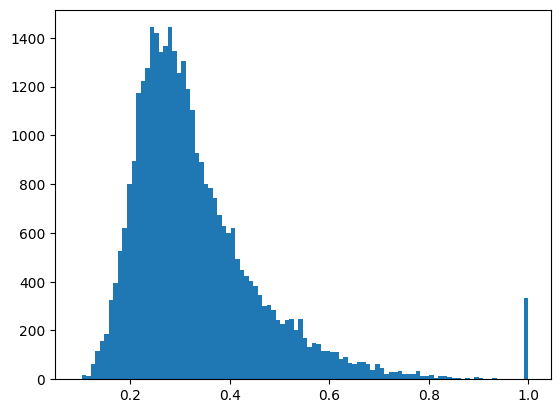

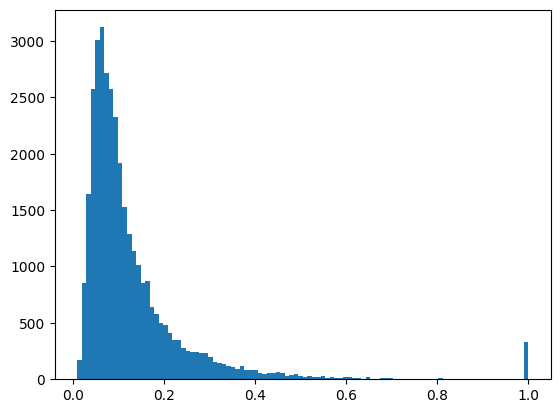

: 

In [ ]:
# plot np_scores that are greater than 0
np_scores_2 = np.sqrt(np_scores)
plt.hist(np_scores_2[np_scores_2 > 0], bins=100)
plt.show()

plt.hist(np_scores[np_scores > 0], bins=100)
plt.show()